#esse projeto visa aplicar o uso das bibliotecas pandas numpy e matplotlib para a conclusão do projeto individual do modulo 4

In [1]:
import numpy as np

In [2]:
import pandas as pd

- recebemos uma imagem de um DataSet e eu decidi transformar essas informações em 4 listas

In [4]:
dias=['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']
horastrabalhadas=[6,7,8,6,7,5,4]
bugscorrigidos=[3,2,1,4,3,2,1]
tarefasconcluidas=[5,4,6,4,5,3,2]

- Transformando listam em dicionario, e em DataFrame

In [13]:
#transformando as listas provenientes dos dados da imagem da tabela fornecida em dicionário
dici={
    'Dia':dias,
    'Horas Trabalhadas':horastrabalhadas,
    'Bugs Corrigidos':bugscorrigidos,
    'Tarefas Concluídas':tarefasconcluidas
}

#transformandoo dicionario em DataFrame
df=pd.DataFrame(dici)

# Produtividade Diária de Tarefas (Tarefas Concluídas por Hora)
df["Produtividade Diária de tarefas"] = df["Tarefas Concluídas"] / df["Horas Trabalhadas"]

# Produtividade Diária de Correção de Bugs (Bugs Corrigidos por Hora)
df["Produtividade de correção de bugs"] = df["Bugs Corrigidos"] / df["Horas Trabalhadas"]

# Produtividade Geral (Atividades por Hora)
df["Produtividade geral"] = (df["Bugs Corrigidos"] + df["Tarefas Concluídas"]) / df["Horas Trabalhadas"]

# Arredondar os valores para 2 casas decimais
df = df.round(2)

df

,Dia,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas,Produtividade Diária de tarefas,Produtividade de correção de bugs,Produtividade geral
0,Segunda,6,3,5,0.83,0.50,1.33
1,Terça,7,2,4,0.57,0.29,0.86
2,Quarta,8,1,6,0.75,0.12,0.88
3,Quinta,6,4,4,0.67,0.67,1.33
4,Sexta,7,3,5,0.71,0.43,1.14
5,Sábado,5,2,3,0.60,0.40,1.00
6,Domingo,4,1,2,0.50,0.25,0.75


In [14]:
import matplotlib.pyplot as plt

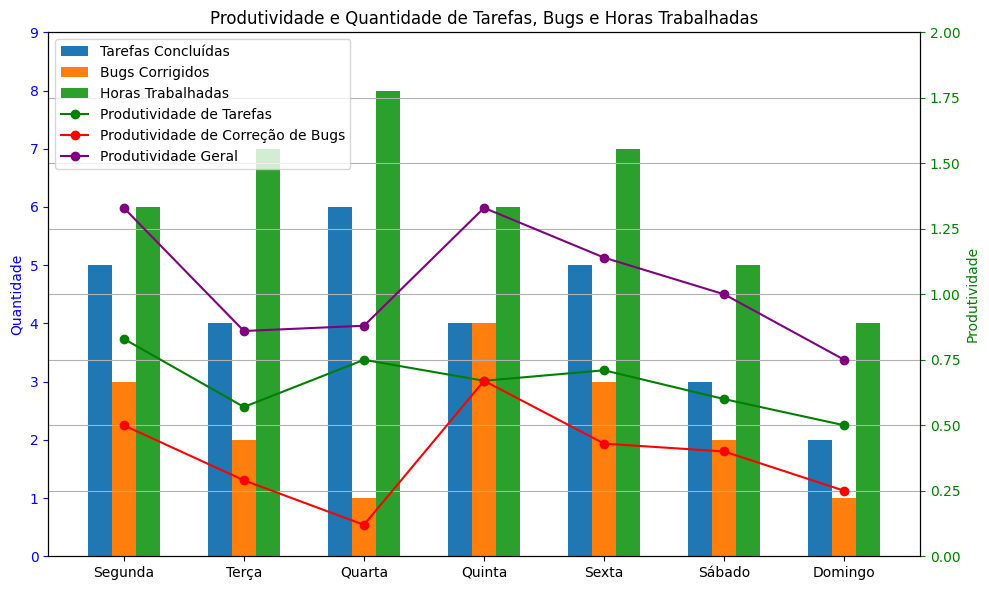

In [18]:
# Configurações para melhor visualização
fig, ax1 = plt.subplots(figsize=(10, 6))  # Tamanho da figura

# Plotar gráfico de barras para o número de tarefas concluídas, bugs corrigidos e horas trabalhadas
x = np.arange(len(df['Dia']))  # Posições no eixo X para as barras
bar_width = 0.2  # Largura das barras

ax1.bar(x - bar_width, df['Tarefas Concluídas'], bar_width, label='Tarefas Concluídas')
ax1.bar(x, df['Bugs Corrigidos'], bar_width, label='Bugs Corrigidos')
ax1.bar(x + bar_width, df['Horas Trabalhadas'], bar_width, label='Horas Trabalhadas')

# Configurações do eixo Y das barras
ax1.set_ylabel('Quantidade')
ax1.set_ylim(0, 9)
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')

# Plotar linhas para a produtividade diária de tarefas, produtividade diária de correção de bugs e produtividade geral
ax2 = ax1.twinx()  # Criar um segundo eixo Y para as linhas

ax2.plot(df['Dia'], df['Produtividade Diária de tarefas'], label='Produtividade de Tarefas', color='green', marker='o')
ax2.plot(df['Dia'], df['Produtividade de correção de bugs'], label='Produtividade de Correção de Bugs', color='red', marker='o')
ax2.plot(df['Dia'], df['Produtividade geral'], label='Produtividade Geral', color='purple', marker='o')

# Configurações do eixo Y das linhas
ax2.set_ylabel('Produtividade')
ax2.set_ylim(0, 2)
ax2.yaxis.label.set_color('green')
ax2.tick_params(axis='y', colors='green')

# Configurações do gráfico
plt.xlabel('Dia')
plt.title('Produtividade e Quantidade de Tarefas, Bugs e Horas Trabalhadas')
plt.xticks(x, df['Dia'], rotation=45)  # Rótulos do eixo X correspondentes aos dias
plt.grid(True)  # Habilitar as linhas de grade

# Combinação das legendas dos dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()  # Ajustar o espaçamento dos elementos do gráfico para melhor visualização

# Mostrar o gráfico
plt.show()

In [19]:
df.describe().round(2)

,Horas Trabalhadas,Bugs Corrigidos,Tarefas Concluídas,Produtividade Diária de tarefas,Produtividade de correção de bugs,Produtividade geral
count,7.00,7.00,7.00,7.00,7.00,7.00
mean,6.14,2.29,4.14,0.66,0.38,1.04
std,1.35,1.11,1.35,0.11,0.18,0.23
min,4.00,1.00,2.00,0.50,0.12,0.75
25%,5.50,1.50,3.50,0.58,0.27,0.87
50%,6.00,2.00,4.00,0.67,0.40,1.00
75%,7.00,3.00,5.00,0.73,0.46,1.23
max,8.00,4.00,6.00,0.83,0.67,1.33


##minhas primeiras impressões

- trabalharam 7 dias sem descanço
- com base nos dados não podemos dizer se os bugs resolvidos refletem a real quantidade de bugs existentes
- a quantidade de horas trabalhadas em um dia parecem influenciar de maneira complexa o desempenho da equipe de programadores

#Vamos entender o significado de cada desvio padrão específico no contexto das estatísticas fornecidas

  - **Desvio Padrão Horas Trabalhadas: 1.35**

  Isso significa que, quanto maior o desvio padrão, maior é a variabilidade das horas trabalhadas entre os funcionários.

  - **Desvio Padrão Produtividade Diária de Tarefas: 0.11**

  Um desvio padrão menor indica que os valores estão mais próximos da média, ou seja, a produtividade diária de tarefas está mais consistente entre os funcionários.

  - **Desvio Padrão Produtividade de Correção de Bugs: 0.18**

  Novamente, um desvio padrão menor indica uma maior consistência nas atividades de correção de bugs entre os funcionários.

  - **Desvio Padrão Produtividade Geral: 0.23**

  Isso indica a variabilidade das atividades realizadas por hora em relação à média. Quanto maior o desvio padrão, maior é a variação nas atividades realizadas entre os funcionários.

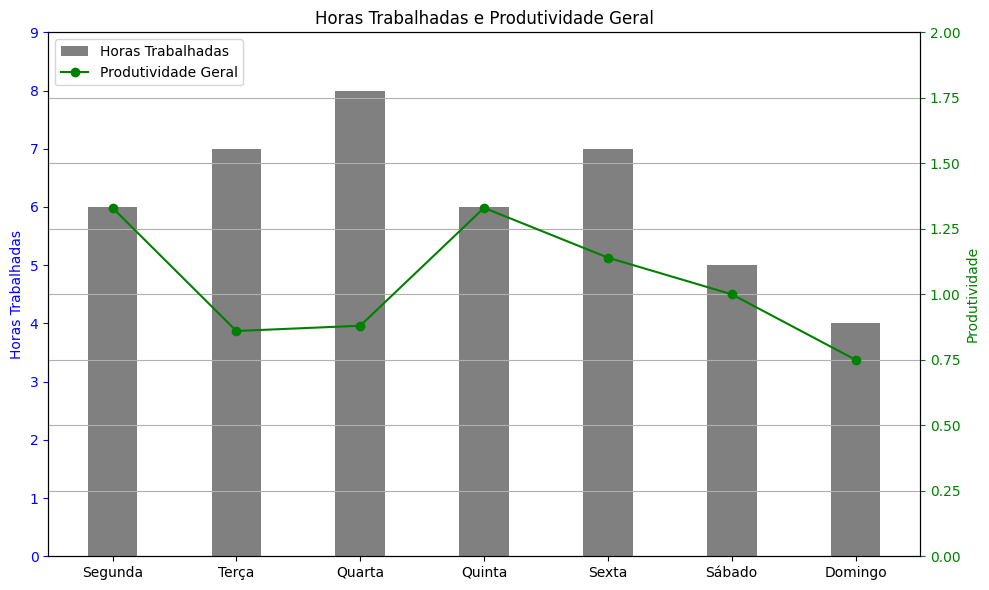

In [21]:
# Configurações para melhor visualização
fig, ax1 = plt.subplots(figsize=(10, 6))  # Tamanho da figura

# Plotar gráfico de barras para as horas trabalhadas
x = df['Dia']  # Dados do eixo X para as barras
bar_width = 0.4  # Largura das barras

ax1.bar(x, df['Horas Trabalhadas'], bar_width, label='Horas Trabalhadas', color='gray')

# Configurações do eixo Y das barras (Horas Trabalhadas)
ax1.set_ylabel('Horas Trabalhadas')
ax1.set_ylim(0, 9)
ax1.yaxis.label.set_color('blue')
ax1.tick_params(axis='y', colors='blue')

# Plotar linha para a produtividade geral
ax2 = ax1.twinx()  # Criar um segundo eixo Y para a linha da produtividade

ax2.plot(df['Dia'], df['Produtividade geral'], label='Produtividade Geral', color='green', marker='o')

# Configurações do eixo Y da linha (Produtividade Geral)
ax2.set_ylabel('Produtividade')
ax2.set_ylim(0, 2)
ax2.yaxis.label.set_color('green')
ax2.tick_params(axis='y', colors='green')

# Configurações do gráfico
plt.xlabel('Dia')
plt.title('Horas Trabalhadas e Produtividade Geral')
plt.xticks(rotation=45)  # Rótulos do eixo X correspondentes aos dias
plt.grid(True)  # Habilitar as linhas de grade

# Combinação das legendas dos dois eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()  # Ajustar o espaçamento dos elementos do gráfico para melhor visualização

# Mostrar o gráfico
plt.show()

#relatório final

- A partir dos dados fornecidos pudemos supor uma relação entre as horas trabalhadas e a produtividade geral da equipe. Existe um ponto de equilibrio entre 8 e 4 horas de trabalho nessa rotina diária. Sem maiores contextualizações podemos concluir que as teses da jornada de trabalho reduzida (semana de 4 dias) poderiam ser aplicadas no âmbito de testes de produtividade da equipe para validar a suposição.